In [1]:
import pandas as pd #For data manipulation
import numpy as np #Separating emotions
import glob #For file directories
import os
import soundfile #Creating sound files
import sys
import librosa #For audio analysis
import librosa.display
#import seaborn as sbn
import matplotlib.pyplot as plt #Plotting
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report #Showing emotion features
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

from IPython.display import Audio

import scipy.io.wavfile
from scipy.fftpack import dct

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
RavdessData = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/RAVDESS_Baseline/"
CasiaData = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/CASIA_Baseline/"
EmodbData = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/EmoDB_Baseline/"
UrduData = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/URDU_Baseline/"
Combined = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/Combined_Baseline/"

In [3]:
# Extracting RAVDESS data
fileEmotion_RAVDESS = []
filePath_RAVDESS= []
RavdessList = os.listdir(RavdessData)
for dir in RavdessList:
    if dir[16] == '1':
        x = 'n'
    elif dir[16] == '3':
        x = 'h'
    elif dir[16] == '4':
        x = 's'
    elif dir[16] == '5':
        x = 'a'
    save = Combined + x +'_'+'R'+'_'+dir
    signal, sr = librosa.load(RavdessData+dir)
    soundfile.write(save, signal, sr)
#df = pd.DataFrame({'Label':filePath_RAVDESS, 'Path': filePath_RAVDESS})

In [4]:
# Extracting Emodb data
EmodbList = os.listdir(EmodbData)
for dir in EmodbList:
    #filePath.append(EmodbData+dir)
    #print(dir[5])
    if dir[5] == 'N':
        x = 'n'
    elif dir[5] == 'F':
        x = 'h'
    elif dir[5] == 'T':
        x = 's'
    elif dir[5] == 'W':
        x = 'a'
    save = Combined + x +'_'+'E'+'_'+dir
    signal, sr = librosa.load(EmodbData+dir)
    soundfile.write(save, signal, sr)
    
#df = pd.DataFrame({'Label':filePath_RAVDESS, 'Path': filePath_RAVDESS})

In [5]:
# Extracting Emodb data
CasiaList = os.listdir(CasiaData)
for dir in CasiaList:
    #filePath.append(EmodbData+dir)
    save = Combined + dir[4] +'_'+'C'+'_'+dir
    signal, sr = librosa.load(CasiaData+dir)
    soundfile.write(save, signal, sr)
#df = pd.DataFrame({'Label':filePath_RAVDESS, 'Path': filePath_RAVDESS})

In [6]:
# Extracting Emodb data
   
for dir in UrduList:
    #filePath.append(EmodbData+dir)
    save = Combined + dir[0] +'_'+'U'+'_'+dir
    signal, sr = librosa.load(UrduData+dir)
    soundfile.write(save, signal, sr)
#df = pd.DataFrame({'Label':filePath_RAVDESS, 'Path': filePath_RAVDESS})

NameError: name 'UrduList' is not defined

In [ ]:
emotionList = []
CombinedList = os.listdir(Combined)
for dir in CombinedList:
    if dir[0] == 'n': #Neutral
        x = 3
    elif dir[0] == 'h': #Happy
        x = 0
    elif dir[0] == 's': #Sad
        x = 1
    elif dir[0] == 'a': #Angry
        x = 2
    emotionList.append(x)
print(len(emotionList))

In [ ]:
pathList = []
for dir in CombinedList:
    pathList.append(dir)

In [ ]:
df = pd.DataFrame({'Label':emotionList, 'Path':pathList})
df

In [ ]:
title = []
for path in df.Path:
    title.append(path[0:3])
df['Title'] = title

In [ ]:
df['Title'].value_counts()

In [ ]:
destination = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/Combined_Baseline_Shortened/"
CombinedList = os.listdir(Combined)
countaC = 0
counthC = 0
countnC = 0
countsC = 0
countaR = 0
counthR = 0
countnR = 0
countsR = 0
countaE = 0
counthE = 0
countnE = 0
countsE = 0
countaU = 0
counthU = 0
countnU = 0
countsU = 0
for dir in CombinedList:
    if dir[0:3] == 'a_C':
        countaC = countaC + 1
        if countaC <= 62:
            signal, sr = librosa.load(Combined+dir)
            soundfile.write(destination+dir, signal, sr)
    elif dir[0:3] == 'h_C':
        counthC = counthC + 1
        if counthC <= 62:
            signal, sr = librosa.load(Combined+dir)
            soundfile.write(destination+dir, signal, sr)
    elif dir[0:3] == 'n_C':
        countnC = countnC + 1
        if countnC <= 62:
            signal, sr = librosa.load(Combined+dir)
            soundfile.write(destination+dir, signal, sr)
    elif dir[0:3] == 's_C':
        countsC = countsC + 1
        if countsC <= 62:
            signal, sr = librosa.load(Combined+dir)
            soundfile.write(destination+dir, signal, sr)
    elif dir[0:3] == 'a_R':
        countaR = countaR + 1
        if countaR <= 62:
            signal, sr = librosa.load(Combined+dir)
            soundfile.write(destination+dir, signal, sr)
    elif dir[0:3] == 'h_R':
        counthR = counthR + 1
        if counthR <= 62:
            signal, sr = librosa.load(Combined+dir)
            soundfile.write(destination+dir, signal, sr)
    elif dir[0:3] == 'n_R':
        countnR = countnR + 1
        if countnR <= 62:
            signal, sr = librosa.load(Combined+dir)
            soundfile.write(destination+dir, signal, sr)
    elif dir[0:3] == 's_R':
        countsR = countsR + 1
        if countsR <= 62:
            signal, sr = librosa.load(Combined+dir)
            soundfile.write(destination+dir, signal, sr)
    elif dir[0:3] == 'a_E':
        countaE = countaE + 1
        if countaE <= 62:
            signal, sr = librosa.load(Combined+dir)
            soundfile.write(destination+dir, signal, sr)
    elif dir[0:3] == 'h_E':
        counthE = counthE + 1
        if counthE <= 62:
            signal, sr = librosa.load(Combined+dir)
            soundfile.write(destination+dir, signal, sr)
    elif dir[0:3] == 'n_E':
        countnE = countnE + 1
        if countnE <= 62:
            signal, sr = librosa.load(Combined+dir)
            soundfile.write(destination+dir, signal, sr)
    elif dir[0:3] == 's_E':
        countsE = countsE + 1
        if countsE <= 62:
            signal, sr = librosa.load(Combined+dir)
            soundfile.write(destination+dir, signal, sr)
    elif dir[0:3] == 'a_U':
        countaU = countaU + 1
        if countaU <= 62:
            signal, sr = librosa.load(Combined+dir)
            soundfile.write(destination+dir, signal, sr)
    elif dir[0:3] == 'h_U':
        counthU = counthU + 1
        if counthU <= 62:
            signal, sr = librosa.load(Combined+dir)
            soundfile.write(destination+dir, signal, sr)
    elif dir[0:3] == 'n_U':
        countnU = countnU + 1
        if countnU <= 62:
            signal, sr = librosa.load(Combined+dir)
            soundfile.write(destination+dir, signal, sr)
    elif dir[0:3] == 's_U':
        countsU = countsU + 1
        if countsU <= 62:
            signal, sr = librosa.load(Combined+dir)
            soundfile.write(destination+dir, signal, sr)


In [76]:
destination = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/Combined_Baseline_Shortened_Cropped/"
home = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/Combined_Baseline_Shortened/"
homeList = os.listdir(home)
fileDuration = []
label =[]
for dir in homeList:
    signal, sr = librosa.load(home+dir)
    fileDuration.append(len(signal))
    label.append(dir[0])

a    248
h    248
n    248
s    248
Name: Label, dtype: int64

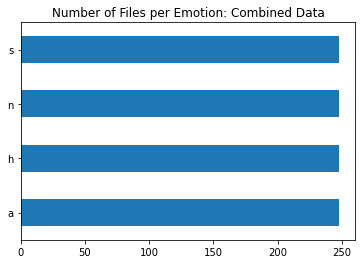

In [77]:
df = pd.DataFrame({'Label':label, 'Duration':fileDuration})
distribution = df['Label'].value_counts().plot(kind='barh', title='Number of Files per Emotion: Combined Data')
df['Label'].value_counts()


In [78]:
avgDuration = sum(df['Duration'])/len(df['Duration'])
minDuration = min(df['Duration'])
maxDuration = max(df['Duration'])
print(avgDuration/sr)
print(minDuration/sr)
print(maxDuration/sr)

df["Duration_sec"] = df['Duration']/sr 

2.8199886621315193
2.0
4.0


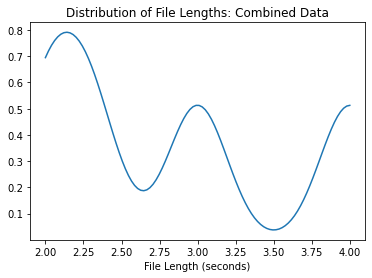

75.0% of files have a length shorter than 3.00 seconds.


In [79]:
#plt.plot(np.array(fileDuration))
#plt.show()
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

pdf = gaussian_kde(df['Duration_sec'])#, bins = 30)#.plot(kind='kde', title="Distribution of File Lengths: EmoDB")
x = np.linspace(df['Duration_sec'].min(), df['Duration_sec'].max(), 100)
plt.plot(x,pdf(x))
plt.xlabel("File Length (seconds)")
plt.title("Distribution of File Lengths: Combined Data")
plt.show()

cdf = df['Duration_sec'].value_counts(normalize=True).sort_index().cumsum()

threshold = 0.75
point = cdf[cdf <= threshold].index.max()
print(f"{threshold*100}% of files have a length shorter than {point:.2f} seconds.")
# 5 seconds is good to cut

In [80]:
setfileDuration = 3*sr # set file duration to 4 seconds
destination = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/Combined_Baseline_Shortened_Cropped/"
home = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/Combined_Baseline_Shortened/"
homeList = os.listdir(home)
fileDuration = []
label =[]
i = 0
for dir in homeList:
    signal, sr = librosa.load(home+dir)
    savePath = destination + dir
    if df['Duration_sec'][i] != setfileDuration :
            # crop soundwave 
        trimmedFiles = librosa.util.fix_length(signal, int(setfileDuration))
        soundfile.write(savePath, trimmedFiles, sr)
    else:
        soundfile.write(savePath, signal, sr)
    i = i+1
    

# PreProcessing

In [3]:
import librosa
import soundfile as sf
import os
import numpy as np

# Set the directories for the input and output files
home = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/Combined_Baseline_Shortened_Cropped/"
destination = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/Combined_LogMMSE_Shortened_Cropped/"

# Define the logMMSE parameters
n_fft = 1024
win_length = n_fft
hop_length = win_length // 4
n_iter = 10

# Loop through each file in the input directory
for filename in os.listdir(home):
    # Load in the audio file
    y, sr = librosa.load(home + filename)

    # Apply the logMMSE algorithm to the audio signal
    D = librosa.stft(y, n_fft=n_fft, win_length=win_length, hop_length=hop_length)
    D_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    log_D_db = D_db
    for i in range(n_iter):
        log_D_db = librosa.decompose.nn_filter(log_D_db, aggregate=np.median, metric='cosine')
        log_D_db = librosa.decompose.nn_filter(log_D_db, aggregate=np.median, metric='euclidean')
        log_D_db = librosa.decompose.nn_filter(log_D_db, aggregate=np.min, metric='cosine', width=int(librosa.time_to_frames(0.25, sr=sr, hop_length=hop_length)))
        log_D_db = librbest_val_acc = 0.0
best_epoch = None
num_epochs = 24
count = 0
Epoch_list = [1, 2 ,3,4,5,6, 8, 10, 14, 16, 18, 20, 24]
HistoryData = []
Val_loss_Data = []
Val_Acc_Data = []
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
for Loop_Var in Epoch_list:
    # Train the model for one epoch
    history = model.fit(X_train, Y_train, batch_size=32 , epochs=Loop_Var , verbose=1, validation_data=(X_test, Y_test))
    HistoryData.append(history)

    # Evaluate the model on the validation set
    val_loss, val_acc = model.evaluate(X_test, Y_test, batch_size=32, verbose=1)
    Val_loss_Data.append(val_loss)
    Val_Acc_Data.append(val_acc)

    # Check if this epoch had the best validation accuracy so far
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_epoch = Loop_Var
        # Save the model weights for the best epoch
        model.save_weights('best_model_weights.h5')
    count = count + 1
    print(count)
print('Loop Completed')
# Load the weights for the best epoch
model.load_weights('best_model_weights.h5')

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, Y_test, batch_size=32, verbose=1)

print("Best epoch: {} with validation accuracy: {}".format(best_epoch, best_val_acc))
print("Test loss: {} Test accuracy: {}".format(test_loss, test_acc))osa.decompose.nn_filter(log_D_db, aggregate=np.min, metric='euclidean', width=int(librosa.time_to_frames(0.25, sr=sr, hop_length=hop_length)))
    log_D_db = librosa.util.fix_length(log_D_db, D.shape[1])
    log_D = librosa.db_to_amplitude(log_D_db)
    y_out = librosa.istft(log_D, hop_length=hop_length)

    # Save the modified audio file to disk
    sf.write(destination + filename, y_out, sr)


In [ ]:
# code above is logMMSE ->42.71% 10 epoch
# code below is MMSE -> 65.82%

In [40]:
import os
import soundfile as sf
import numpy as np
import librosa

# Set the directories for the input and output files
input_dir = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/Combined_AugmentNoise_Shortened_Cropped/"
output_dir = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/Combined_AugmentMMSE_Shortened_Cropped/"

# Set the parameters for the MMSE algorithm
frame_length = 1024
frame_overlap = frame_length // 2
noise_std = 0.05

# Iterate over the audio files in the input directory
for filename in os.listdir(input_dir):
    # Load the audio file
    filepath = os.path.join(input_dir, filename)
    signal, sample_rate = sf.read(filepath)

    # Apply the MMSE algorithm
    noisy_stft = np.abs(librosa.stft(signal, n_fft=frame_length, hop_length=frame_overlap))
    noise_stft = np.abs(librosa.stft(np.random.randn(*signal.shape), n_fft=frame_length, hop_length=frame_overlap))
    noise_std_stft = noise_std * np.mean(noise_stft, axis=1, keepdims=True)
    gain = np.maximum(1 - noise_std_stft ** 2 / (noisy_stft ** 2 + noise_std_stft ** 2), 0)
    filtered_stft = gain * noisy_stft

    # Inverse STFT to get the filtered signal
    filtered_signal = librosa.istft(filtered_stft, hop_length=frame_overlap)

    # Save the filtered signal to a new file
    output_filepath = os.path.join(output_dir, filename)
    sf.write(output_filepath, filtered_signal, sample_rate)


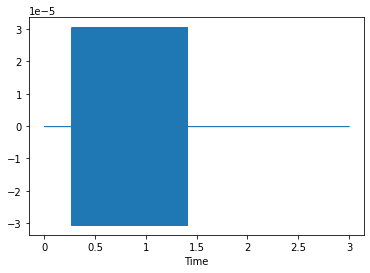

In [36]:
signal, sr = librosa.load('C:/Users/Lenovo/Documents/3rd Year Project/Dataset/Combined_LogMMSE_Shortened_Cropped/a_C_201-angry-liuchanhg.wav')
librosa.display.waveshow(signal,sr=sr)

Text(0.5, 1.0, 'RAVDESS Anger: MMSE')

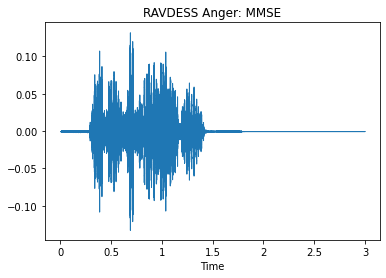

In [39]:
signal, sr = librosa.load('C:/Users/Lenovo/Documents/3rd Year Project/Dataset/Combined_MMSE_Shortened_Cropped/a_C_201-angry-liuchanhg.wav')
librosa.display.waveshow(signal,sr=sr)
plt.title("RAVDESS Anger: MMSE")


Text(0.5, 1.0, 'RAVDESS Anger: Noise Augmentation + MMSE')

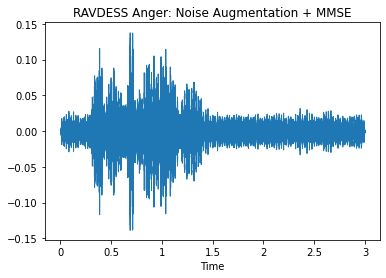

In [57]:
signal, sr = librosa.load('C:/Users/Lenovo/Documents/3rd Year Project/Dataset/Combined_AugmentMMSE_Shortened_Cropped/a_C_201-angry-liuchanhg.wav')
librosa.display.waveshow(signal,sr=sr)
plt.title("RAVDESS Anger: Noise Augmentation + MMSE")


Text(0.5, 1.0, 'RAVDESS Anger: Noise Augmentation')

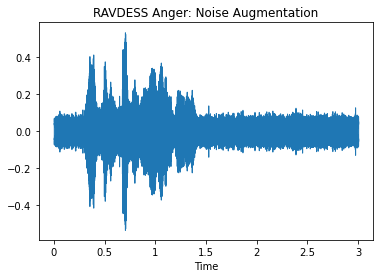

In [56]:
signal, sr = librosa.load('C:/Users/Lenovo/Documents/3rd Year Project/Dataset/Combined_AugmentNoise_Shortened_Cropped/a_C_201-angry-liuchanhg.wav')
librosa.display.waveshow(signal,sr=sr)
plt.title("RAVDESS Anger: Noise Augmentation")

Text(0.5, 1.0, 'RAVDESS Anger: Zero-Padding')

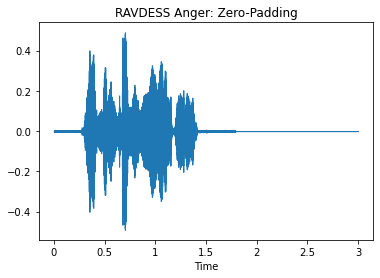

In [38]:
signal, sr = librosa.load('C:/Users/Lenovo/Documents/3rd Year Project/Dataset/Combined_Baseline_Shortened_Cropped/a_C_201-angry-liuchanhg.wav')
librosa.display.waveshow(signal,sr=sr)
plt.title("RAVDESS Anger: Zero-Padding")

In [44]:
import librosa
from os import listdir
from os.path import isfile, join
data = []
label = []
Path = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/Combined_MMSE_Shortened_Cropped/"
files = [f for f in listdir(Path) if isfile(join(Path, f))]
for x in files:
    filePath = Path + x
    label.append(x[0])
    signal, sr = librosa.load(filePath, sr=None)
    #mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 20) 
    mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18) 
    #mfcc_1d = np.ravel(mfcc)
    data.append(mfcc)

In [45]:
data = np.array(data)
data.shape

(992, 18, 259)

In [46]:
X = np.expand_dims(data, axis=3)
X.shape

(992, 18, 259, 1)

In [47]:
label

['a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a'

In [48]:
label_new = []
for i in range(len(label)):
    if label[i] == 'n': #Neutral
        x=3
    elif label[i] == 'h': #Happy
        x=0
    elif label[i] == 's': #S
        x=1
    elif label[i] == 'a': #Angry
        x = 2
    label_new.append(x)

print(label_new)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [49]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau

In [50]:
x_train, x_test, y_train, y_test = train_test_split(X, label_new, test_size = 0.2)

In [51]:
X_train = np.array(x_train)
X_test = np.array(x_test)
Y_train = np.array(y_train)
Y_test = np.array(y_test)
print(X_train.shape)

(793, 18, 259, 1)


In [52]:
# This model gives 62% with 30 mfccs, 75.6% for 18 mfccs
# change epochs from 20 - 24
model = Sequential()
from keras.layers import BatchNormalization
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(18, 259, 1)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=4, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 18, 259, 64)       640       
                                                                 
 batch_normalization_10 (Bat  (None, 18, 259, 64)      256       
 chNormalization)                                                
                                                                 
 conv2d_9 (Conv2D)           (None, 18, 259, 64)       36928     
                                                                 
 batch_normalization_11 (Bat  (None, 18, 259, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 9, 129, 64)       0         
 2D)                                                             
                                                      

In [27]:
best_val_acc = 0.0
best_epoch = None
num_epochs = 24
count = 0
Epoch_list = [14, 16, 18, 20, 24]
HistoryData = []
Val_loss_Data = []
Val_Acc_Data = []
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
for Loop_Var in Epoch_list:
    # Train the model for one epoch
    history = model.fit(X_train, Y_train, batch_size=32 , epochs=Loop_Var , verbose=1, validation_data=(X_test, Y_test))
    HistoryData.append(history)

    # Evaluate the model on the validation set
    val_loss, val_acc = model.evaluate(X_test, Y_test, batch_size=32, verbose=1)
    Val_loss_Data.append(val_loss)
    Val_Acc_Data.append(val_acc)

    # Check if this epoch had the best validation accuracy so far
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_epoch = Loop_Var
        # Save the model weights for the best epoch
        model.save_weights('best_model_weights.h5')
    count = count + 1
    print(count)
print('Loop Completed')
# Load the weights for the best epoch
model.load_weights('best_model_weights.h5')

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, Y_test, batch_size=32, verbose=1)

print("Best epoch: {} with validation accuracy: {}".format(best_epoch, best_val_acc))
print("Test loss: {} Test accuracy: {}".format(test_loss, test_acc))

Epoch 1/14
25/25 [==============================] - 82s 3s/step - loss: 1.6671 - accuracy: 0.4388 - val_loss: 34.8061 - val_accuracy: 0.1960
Epoch 2/14
25/25 [==============================] - 74s 3s/step - loss: 1.0503 - accuracy: 0.5851 - val_loss: 11.8846 - val_accuracy: 0.3116
Epoch 3/14
25/25 [==============================] - 81s 3s/step - loss: 0.7726 - accuracy: 0.7175 - val_loss: 4.6004 - val_accuracy: 0.3317
Epoch 4/14
25/25 [==============================] - 83s 3s/step - loss: 0.6009 - accuracy: 0.7692 - val_loss: 3.8438 - val_accuracy: 0.2261
Epoch 5/14
25/25 [==============================] - 82s 3s/step - loss: 0.5816 - accuracy: 0.7755 - val_loss: 1.1953 - val_accuracy: 0.5628
Epoch 6/14
25/25 [==============================] - 82s 3s/step - loss: 0.4159 - accuracy: 0.8411 - val_loss: 1.5966 - val_accuracy: 0.4975
Epoch 7/14
25/25 [==============================] - 82s 3s/step - loss: 0.3158 - accuracy: 0.8840 - val_loss: 1.4025 - val_accuracy: 0.5879
Epoch 8/14
25/25 [

25/25 [==============================] - 172s 7s/step - loss: 0.0166 - accuracy: 0.9937 - val_loss: 1.9125 - val_accuracy: 0.6734
Epoch 10/20
25/25 [==============================] - 157s 6s/step - loss: 0.0091 - accuracy: 0.9975 - val_loss: 1.6797 - val_accuracy: 0.6583
Epoch 11/20
25/25 [==============================] - 156s 6s/step - loss: 0.0175 - accuracy: 0.9924 - val_loss: 1.8493 - val_accuracy: 0.5879
Epoch 12/20
25/25 [==============================] - 134s 5s/step - loss: 0.0159 - accuracy: 0.9937 - val_loss: 2.2838 - val_accuracy: 0.6030
Epoch 13/20
25/25 [==============================] - 133s 5s/step - loss: 0.0237 - accuracy: 0.9912 - val_loss: 1.9988 - val_accuracy: 0.6683
Epoch 14/20
25/25 [==============================] - 148s 6s/step - loss: 0.0293 - accuracy: 0.9924 - val_loss: 2.0919 - val_accuracy: 0.6332
Epoch 15/20
25/25 [==============================] - 126s 5s/step - loss: 0.0116 - accuracy: 0.9975 - val_loss: 2.5096 - val_accuracy: 0.6281
Epoch 16/20
25/25 

In [24]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [54]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=32 , epochs=20 , verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
25/25 [==============================] - 64s 2s/step - loss: 0.2847 - accuracy: 0.8941 - val_loss: 10.0040 - val_accuracy: 0.2965
Epoch 2/20
25/25 [==============================] - 62s 2s/step - loss: 0.3010 - accuracy: 0.9029 - val_loss: 3.2501 - val_accuracy: 0.4975
Epoch 3/20
25/25 [==============================] - 67s 3s/step - loss: 0.1715 - accuracy: 0.9407 - val_loss: 2.1886 - val_accuracy: 0.5477
Epoch 4/20
25/25 [==============================] - 67s 3s/step - loss: 0.1398 - accuracy: 0.9445 - val_loss: 2.4722 - val_accuracy: 0.5327
Epoch 5/20
25/25 [==============================] - 66s 3s/step - loss: 0.1120 - accuracy: 0.9660 - val_loss: 2.6447 - val_accuracy: 0.4874
Epoch 6/20
25/25 [==============================] - 65s 3s/step - loss: 0.0603 - accuracy: 0.9849 - val_loss: 1.9477 - val_accuracy: 0.5829
Epoch 7/20
25/25 [==============================] - 64s 3s/step - loss: 0.0570 - accuracy: 0.9849 - val_loss: 2.2013 - val_accuracy: 0.5528
Epoch 8/20
25/25 [=

In [58]:
# 61.81% is achieved 20 epochs + data augmentation
# Calculate precision and recall
# Get the predicted probabilities for the validation set
y_pred_proba = model.predict(X_test)

# Convert the predicted probabilities to class labels
y_pred = np.argmax(y_pred_proba, axis=1)

# Compute precision and recall using scikit-learn metrics
from sklearn.metrics import precision_score, recall_score
precision = precision_score(Y_test, y_pred, average='weighted')
recall = recall_score(Y_test, y_pred, average='weighted')

print('Precision:', precision)
print('Recall:', recall)

# Pre-Emphasis
# Pre-Emphasis + Windowing: Precision: 77.97% Recall: 75.37%

7/7 [==============================] - 7s 742ms/step
Precision: 0.6813722104220991
Recall: 0.6180904522613065
